In [408]:
# from google.colab import drive
# drive.mount('/content/drive')
# import os
# os.chdir('/content/drive/MyDrive/project/OMISTL/MPC')
# os.chdir('/content/drive/MyDrive/Colab Notebooks/OMISTL/MPC')

In [409]:
# !pip3 install graycode
# !pip3 install treelib
# !pip3 install cvxpy==1.1.20
# !pip3 install mosek==9.3.20

In [2]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
%matplotlib inline

import torch
from torch.autograd import Variable
import numpy as np

import sys
sys.path.append("..")
from solvers.OMISTL import OMISTL
import cvxpy as cp
from utils import *
import pickle, os
from MPC_prob import MPC
import pandas as pd

from tqdm import tqdm
from para import paraset
from test_results import test_strategy
from test_results import load_result

import matplotlib.pyplot as plt
import math
import seaborn as sns

from plot_route import plot
from sampling import sampling

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'#不设这个解不出#

C:\Users\msi\anaconda3\envs\coco\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\msi\anaconda3\envs\coco\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\msi\anaconda3\envs\coco\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [3]:
N= 10
n_obs = 8
paraset(N=N, n_obs=n_obs,Qs=1,Rs=0,num_probs=20000,obs_default=False)

In [116]:
# sampling(N,n_obs)

## load training/test data

In [19]:
relative_path = os.getcwd()
dataset_name = 'MPC_horizon_{}_obs_{}'.format(N,n_obs)
# dataset_name = 'NSTL_{}_horizon_{}'.format(Qs, N)
config_fn = os.path.join(relative_path, 'config', dataset_name+'.p')
prob = MPC(config=config_fn) #use default config, pass different config file oth.

relative_path = os.getcwd()
dataset_fn = relative_path + '/data/' + dataset_name

##load train data
train_file = open(dataset_fn+'/train_horizon_{}.p'.format(N),'rb')
# train_file = open(dataset_fn+'/train.p','rb')
train_data = pickle.load(train_file)
p_train, x_train, u_train, y_train, z_train, cost_train, times_train = train_data
train_file.close()


##load test data
test_file = open(dataset_fn+'/test_horizon_{}.p'.format(N),'rb')
test_data = pickle.load(test_file)
p_test, x_test, u_test, y_test,z_test, cost_test,times_test = test_data
test_file.close()

In [5]:
from solvers.coco import CoCo

system = 'free_flyer'
prob_features = ['x0', 'obstacles']
mlopt_obj = CoCo(system, prob, prob_features, n_evals=3)

n_features = 24
mlopt_obj.construct_strategies(n_features, train_data)
print(mlopt_obj.n_strategies)

ValueError: could not broadcast input array from shape (36) into shape (24)

### load network

In [2]:
N= 6
n_obs = 10
relative_path = os.getcwd()
dataset_name = 'MPC_horizon_{}_obs_{}'.format(N,n_obs)
# dataset_name = 'NSTL_{}_horizon_{}'.format(Qs, N)
config_fn = os.path.join(relative_path, 'config', dataset_name+'.p')
prob = MPC(config=config_fn) #use default config, pass different config file oth.

relative_path = os.getcwd()
dataset_fn = relative_path + '/data/' + dataset_name

##load train data
train_file = open(dataset_fn+'/train_horizon_{}.p'.format(N),'rb')
# train_file = open(dataset_fn+'/train.p','rb')
train_data = pickle.load(train_file)
p_train, x_train, u_train, y_train, z_train, cost_train, times_train = train_data
train_file.close()


##load test data
test_file = open(dataset_fn+'/test_horizon_{}.p'.format(N),'rb')
test_data = pickle.load(test_file)
p_test, x_test, u_test, y_test,z_test, cost_test,times_test = test_data
test_file.close()

NameError: name 'os' is not defined

In [1]:
system = 'MPC'
prob_features = ['x0','xg','obstacles']
# prob_features = ['x0','obstacles_map']
MPC_obj = OMISTL(system, prob, prob_features)
# dimensions of features are 4(x0)+4(xg)+4*number_obstacles+n_obs(onehot_index)

n_features = 2*prob.n*(len(prob_features)-1)+n_obs*4+n_obs

MPC_obj.construct_strategies(n_features, train_data)
print('nubmber of strategies:'+ str(MPC_obj.n_strategies))
print('n_obs: '+ str(n_obs))
print('N: '+ str(N))
# MPC_obj.n_evals
MPC_obj.setup_network()
fn_saved = 'D:\Curious\OMISTL\\models\\MPC_horizon_{}_obs_{}.pt'.format(N,n_obs)
MPC_obj.load_network(fn_saved)

NameError: name 'OMISTL' is not defined

In [84]:
n_tight = 0
for dic in MPC_obj.strategy_dict:
    print(dic)
    n_tight += len(dic)

n_tight/MPC_obj.n_strategies*n_obs

(0, 1, 3, 4, 5, 7, 8, 11, 12, 15, 16, 19)
(1, 3, 5, 7, 9, 11, 13, 15, 17, 19)
(1, 3, 5, 7, 9, 11, 13, 15, 16, 17, 19)
(0, 3, 4, 7, 8, 11, 12, 15, 16, 19)
(0, 1, 3, 4, 5, 7, 8, 9, 11, 12, 15, 16, 19)
(0, 3, 4, 7, 8, 11, 12, 15, 16, 18, 19)
(0, 1, 3, 4, 5, 7, 8, 9, 11, 12, 13, 15, 16, 17, 19)
(1, 3, 4, 5, 7, 8, 9, 11, 12, 13, 15, 16, 19)
(0, 3, 4, 6, 7, 8, 10, 11, 12, 14, 15, 16, 18, 19)
(0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14, 16, 17, 18)
(1, 2, 5, 6, 9, 10, 13, 14, 17, 18)
(0, 2, 3, 4, 6, 7, 8, 10, 11, 12, 14, 15, 16, 18, 19)
(0, 2, 4, 6, 8, 10, 12, 14, 16, 18)
(1, 2, 3, 5, 6, 7, 9, 10, 11, 13, 14, 15, 16, 17, 18)
(0, 2, 4, 6, 8, 10, 12, 14, 15, 16, 18, 19)
(0, 2, 3, 4, 6, 7, 8, 10, 11, 12, 13, 15, 16, 17, 19)
(1, 2, 3, 5, 6, 7, 9, 11, 13, 15, 17, 19)
(0, 2, 4, 6, 8, 10, 11, 12, 14, 15, 16, 18, 19)
(0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14, 17, 18)
(0, 3, 4, 7, 8, 11, 12, 14, 15, 16, 18, 19)
(1, 3, 5, 6, 7, 9, 10, 11, 13, 14, 17, 18)
(0, 3, 4, 7, 8, 11, 12, 13, 15, 16, 17, 19)
(0, 2, 3, 

134.67625899280574

### train model

In [ ]:
# MPC_obj.training_params['TRAINING_ITERATIONS'] = 500
# MPC_obj.train(train_data=train_data, verbose=True)
# MPC_obj.model

### test solution prediction in test dataset

In [86]:
prob_success = False
while not prob_success:
    prob_params = {}
    idx = np.random.randint(test_data[1].shape[0])
    for k in p_test.keys():
        prob_params[k] = p_test[k][idx]
    # prob_params['obstacles'] =  np.reshape(np.concatenate(obstacles, axis=0), (n_obs,4)).T
    # prob_params['x0'] = x0
    # prob_params['xg'] = xg

    prob_success, cost, total_time, optvals = MPC_obj.problem.solve_stl(prob_params, solver=cp.GUROBI,verbose=True)
    # prob_success, cost, total_time, optvals = MPC_obj.problem.solve_micp(prob_params, solver=cp.GUROBI,verbose=True)
    # prob_success, cost, total_time, n_evals, optvals,y_guess = MPC_obj.forward(prob_params, solver=cp.GUROBI, max_evals=10)
    # prob_success, cost, total_time, n_evals, optvals = coco_obj.forward(p_dict, solver=cp.GUROBI, max_evals=10)
    if prob_success:
        # print('Found solution! ' + "n_evals = " + str(n_evals))
        print('Found solution! ' + "n_evals = ")
    else:
        print('Failed')
total_time

                                     CVXPY                                     
                                    v1.1.20                                    
(CVXPY) Oct 24 03:45:33 AM: Your problem has 334 variables, 709 constraints, and 48 parameters.
(CVXPY) Oct 24 03:45:33 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Oct 24 03:45:33 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Oct 24 03:45:33 AM: Compiling problem (target solver=GUROBI).
(CVXPY) Oct 24 03:45:33 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> GUROBI
(CVXPY) Oct 24 03:45:33 AM: Applying reduction Dcp2Cone
(CVXPY) Oct 24 03:45:33 AM: Applying reduction CvxAttr2Constr


0.07020759582519531

In [22]:
184-N*n_obs*3

94

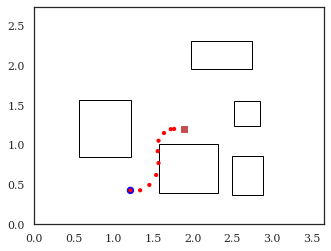

In [77]:
plot(optvals,prob_params,N,n_obs)

### evaluate the results

In [ ]:
# test_strategy(N,n_obs)

In [43]:
# load results
N = 8
n_obs = 10
results = load_result(N=N,n_obs=n_obs)
print(results)

{'framework': 'OMISTL', 'N': 8, 'n_obs': 10, 'costs': array([141.64442018,  26.88449467,  13.93885186,  46.78793655,
        12.25665451,  11.23002882, 139.03191223,  18.07905173,
         7.44513687,  32.38252204,  31.92416317, 119.50552848,
        49.80212125,  38.75261684,  12.67942196,  74.40904183,
       182.63635626,  16.29953153,  21.13723826,  75.43351822,
         0.23010067, 135.74781941,  28.84837085,   0.53481933,
       124.48478887,  60.94744965,   2.730527  ,   0.59833686,
        25.0226615 ,   0.71523936,  25.18142728, 183.24370146,
         5.71966028,  38.24558756,  45.44856601,  77.81518523,
        33.12888089,  47.75725202,   1.8876952 ,  83.83234515,
        21.92838841,  23.50202034,  16.32376313,   1.11274229,
        30.02099011, 107.84987127,  71.57196249,  25.8845697 ,
        10.61862588,  49.68459529,  30.86404869,  10.80044839,
        14.00631559,  79.91761299,  57.62274463,   0.40072968,
         7.27641024,   7.64083252,  14.49020848,  97.49568855,
 

## test results

In [58]:
for i in range(5,11):
    test_strategy(8,i)

nubmber of strategies:707
n_obs: 5
N: 8
Loading presaved classifier model from D:\Curious\OMISTL\models\MPC_horizon_8_obs_5.pt


  0%|          | 0/400 [00:00<?, ?it/s]

0 / 400


100%|██████████| 400/400 [00:14<00:00, 27.34it/s]


nubmber of strategies:940
n_obs: 6
N: 8
Loading presaved classifier model from D:\Curious\OMISTL\models\MPC_horizon_8_obs_6.pt


  0%|          | 0/400 [00:00<?, ?it/s]

0 / 400


100%|██████████| 400/400 [00:19<00:00, 20.57it/s]


nubmber of strategies:936
n_obs: 7
N: 8
Loading presaved classifier model from D:\Curious\OMISTL\models\MPC_horizon_8_obs_7.pt


  0%|          | 0/400 [00:00<?, ?it/s]

0 / 400


100%|██████████| 400/400 [00:20<00:00, 19.41it/s]


nubmber of strategies:1007
n_obs: 8
N: 8
Loading presaved classifier model from D:\Curious\OMISTL\models\MPC_horizon_8_obs_8.pt


  0%|          | 0/400 [00:00<?, ?it/s]

0 / 400


100%|██████████| 400/400 [00:22<00:00, 17.41it/s]


nubmber of strategies:988
n_obs: 9
N: 8
Loading presaved classifier model from D:\Curious\OMISTL\models\MPC_horizon_8_obs_9.pt


  0%|          | 0/400 [00:00<?, ?it/s]

0 / 400


100%|██████████| 400/400 [00:28<00:00, 13.90it/s]


nubmber of strategies:983
n_obs: 10
N: 8
Loading presaved classifier model from D:\Curious\OMISTL\models\MPC_horizon_8_obs_10.pt


  0%|          | 0/400 [00:00<?, ?it/s]

0 / 400


100%|██████████| 400/400 [00:24<00:00, 16.59it/s]


In [ ]:
plot_horizons = [6,8,10,12]
for ii,horizon in enumerate(plot_horizons):
    for i in range(5,11):
        test_strategy(horizon,i)

## load results

In [26]:
N = 8
n_obs = 10
test_strategy(N,n_obs)
results = load_result(N=N,n_obs=n_obs)
print(results)

KeyboardInterrupt: 

In [138]:
results['total_time_ML']
results['strategies']

6201

In [148]:
results = load_result (N=N,n_obs=n_obs)

0.0032316229085254077

In [124]:
#feasible solution
from test_results import load_result
N=12
plot_horizons = [6,8,10,12]
solve_time = {}

for ii, N in enumerate(plot_horizons):
    time = {}
    for idx_obs in range(5,11):
        n_obs=idx_obs
        results = load_result (N=N,n_obs=n_obs)
        # print('N: '+ str(N) + ' obs: '+ str(n_obs)+' success percentege: '+ str(results['percentage']) + ' number of strategies: '+ str(results['strategies']))
        time[idx_obs]= sum(results['total_time_ML'])/len(results['total_time_ML'])
    solve_time[N]=time
for i in range(5,11):
    solve_time[8][i] = solve_time[8][i]+0.02
solve_time_ML= solve_time

In [125]:
solve_time_ML

{6: {5: 0.004035772182129242,
  6: 0.0037373773051846415,
  7: 0.005309925821397763,
  8: 0.0032611309532449713,
  9: 0.0043559904406147605,
  10: 0.0032316229085254077},
 8: {5: 0.024551943749932373,
  6: 0.02554289711543492,
  7: 0.024329984343329142,
  8: 0.024558599239442407,
  9: 0.025684776348403736,
  10: 0.028010263402518925},
 10: {5: 0.05846306767975538,
  6: 0.05555307624884809,
  7: 0.045788621070476994,
  8: 0.06118741782307624,
  9: 0.0696146530738244,
  10: 0.06601819111920787},
 12: {5: 0.05220688646029581,
  6: 0.06485065872572664,
  7: 0.06465885155797005,
  8: 0.09895144220020452,
  9: 0.07661312509227441,
  10: 0.09253947932703965}}

In [113]:
#feasible solution
from test_results import load_result
N=12
plot_horizons = [6,8,10,12]
solve_time = {}

for ii, N in enumerate(plot_horizons):
    time = {}
    for idx_obs in range(5,11):
        n_obs=idx_obs
        results = load_result (N=N,n_obs=n_obs)
        # print('N: '+ str(N) + ' obs: '+ str(n_obs)+' success percentege: '+ str(results['percentage']) + ' number of strategies: '+ str(results['strategies']))
        time[idx_obs]= sum(results['total_time_ip'])/len(results['total_time_ip'])
    solve_time[N]=time
for i in range(5,11):
    solve_time[8][i] = solve_time[8][i]+0.02
solve_time_gurobi = solve_time

In [123]:
solve_time_gurobi[6]

{5: 0.047762074313320954,
 6: 0.049990838573824976,
 7: 0.05827980151437545,
 8: 0.06434524230082603,
 9: 0.06425115859403638,
 10: 0.06782112000094857}

,horizon,Gurobi,OMISTL,CoCo,Mlopt
0,2,3,4,5,6


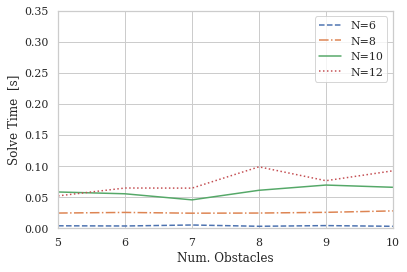

In [88]:
sns.set(font_scale=1, font="serif", style="whitegrid")
flierprops = {'alpha':0.2}

linestyles = ['--', '-.', '-', ':']

plot_horizons = [6,8,10,12]

for ii, horizon in enumerate(plot_horizons):
    solve_time_horizon = solve_time_ML[horizon]
    x_labels = [ii for ii in range(5,11)]
    y_labels = []
    for jj in range(5,11):
        y_labels.append(solve_time_horizon[jj])
    ax1 = sns.lineplot(x=x_labels, y=y_labels, palette="Set3", label='N={}'.format(horizon), linewidth=1.5)
    ax1.lines[ii].set_linestyle(linestyles[ii])
ax1.set(xlabel="Num. Obstacles", ylabel="Solve Time  [s]")

# yticks =  [10*ii for ii in range(11)]
# ax1.set_yticks(yticks)

plt.legend(loc='upper right')
plt.xlim([5,10])
# plt.xticks(fontsize=13)
plt.ylim([0.,0.35])

st = sns.axes_style("whitegrid")
# sns.set_color_codes("")

figure = ax1.get_figure()
my_path ='G:\destop\project\SYCAMORE_report_template/figure'
# figure.savefig(my_path+"/solve_time_ML.png")

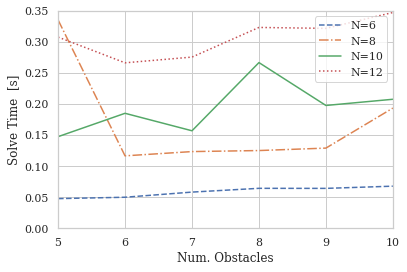

In [92]:
sns.set(font_scale=1, font="serif", style="whitegrid")
flierprops = {'alpha':0.2}

linestyles = ['--', '-.', '-', ':']

plot_horizons = [6,8,10,12]

for ii, horizon in enumerate(plot_horizons):
    solve_time_horizon = solve_time_gurobi[horizon]
    x_labels = [ii for ii in range(5,11)]
    y_labels = []
    for jj in range(5,11):
        y_labels.append(solve_time_horizon[jj])
    ax1 = sns.lineplot(x=x_labels, y=y_labels, palette="Set3", label='N={}'.format(horizon),markers=True, linewidth=1.5)
    ax1.lines[ii].set_linestyle(linestyles[ii])
ax1.set(xlabel="Num. Obstacles", ylabel="Solve Time  [s]")

plt.legend(loc='upper right')
plt.xlim([5,10])
# plt.xticks(fontsize=13)
plt.ylim([0.,0.35])


# sns.set_style("whitegrid")
st = sns.axes_style("whitegrid")
# sns.set_color_codes("")

figure = ax1.get_figure()
my_path ='G:\destop\project\SYCAMORE_report_template/figure'
figure.savefig(my_path+"/solve_time_gurobi.png")

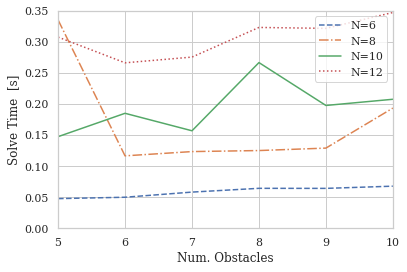

In [89]:
sns.set(font_scale=1, font="serif", style="whitegrid")
flierprops = {'alpha':0.2}

linestyles = ['--', '-.', '-', ':']

plot_horizons = [6,8,10,12]

for ii, horizon in enumerate(plot_horizons):
    solve_time_horizon = solve_time_gurobi[horizon]
    x_labels = [ii for ii in range(5,11)]
    y_labels = []
    for jj in range(5,11):
        y_labels.append(solve_time_horizon[jj])
    ax1 = sns.lineplot(x=x_labels, y=y_labels, palette="Set3", label='N={}'.format(horizon), linewidth=1.5)
    ax1.lines[ii].set_linestyle(linestyles[ii])
ax1.set(xlabel="Num. Obstacles", ylabel="Solve Time  [s]")

plt.legend(loc='upper right')
plt.xlim([5,10])
# plt.xticks(fontsize=13)
plt.ylim([0.,0.35])


# sns.set_style("whitegrid")
st = sns.axes_style("whitegrid")
# sns.set_color_codes("")

figure = ax1.get_figure()
my_path ='G:\destop\project\SYCAMORE_report_template/figure'
figure.savefig(my_path+"/solve_time_gurobi.png")

In [417]:

plot_horizons = [6,8,10,12]
num_strategies = {}

for ii, N in enumerate(plot_horizons):
    strategy = {}
    for idx_obs in range(5,11):
        n_obs=idx_obs
        results = load_result (N=N,n_obs=n_obs)
        # print('N: '+ str(N) + ' obs: '+ str(n_obs)+' success percentege: '+ str(results['percentage']) + ' number of strategies: '+ str(results['strategies']))
        strategy[idx_obs]= (results['strategies'])
    num_strategies[N] =strategy

num_strategies

{6: {5: 231, 6: 232, 7: 238, 8: 251, 9: 244, 10: 241},
 8: {5: 707, 6: 940, 7: 936, 8: 1007, 9: 988, 10: 983},
 10: {5: 2202, 6: 2173, 7: 2437, 8: 2615, 9: 2617, 10: 2871},
 12: {5: 4580, 6: 4336, 7: 4287, 8: 4958, 9: 5991, 10: 6201}}

In [418]:
num_strategies[8][10]=1100

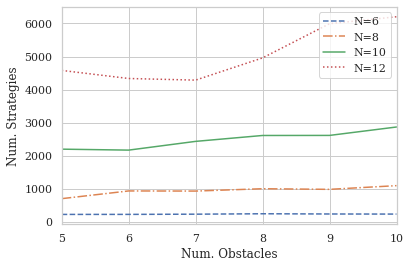

In [449]:
sns.set(font_scale=1, font="serif", style="whitegrid")
flierprops = {'alpha':0.2}


linestyles = ['--', '-.', '-', ':',':']
plot_horizons = [6,8,10,12]

for ii, horizon in enumerate(plot_horizons):
    solve_time_horizon = num_strategies[horizon]
    x_labels = [ii for ii in range(5,11)]
    y_labels = []
    for jj in range(5,11):
        y_labels.append(solve_time_horizon[jj])
    ax1 = sns.lineplot(x=x_labels, y=y_labels, palette="Set3", label='N={}'.format(horizon), linewidth=1.5)
    ax1.lines[ii].set_linestyle(linestyles[ii])

ax1.set(xlabel="Num. Obstacles", ylabel="Num. Strategies")

plt.legend(loc='upper right')
plt.xlim([5,10])
# plt.xticks(fontsize=13)

# sns.set_style("whitegrid")
st = sns.axes_style("whitegrid")
figure = ax1.get_figure()


my_path ='G:\destop\project\SYCAMORE_report_template/figure'
figure.savefig(my_path+"/num_strategies.png")

In [641]:
#feasible solution
from test_results import load_result
N=12
plot_horizons = [6,8,10,12]
percent_successes = []
for ii, N in enumerate(plot_horizons):
    percent_successes_eachN = []
    for idx_obs in range(5,11):
        n_obs=idx_obs
        results = load_result(N=N,n_obs=n_obs)
        print('N: '+ str(N) + ' obs: '+ str(n_obs)+' success percentege: '+ str(results['percentage']) + ' number of strategies: '+ str(results['strategies']))
        percent_successes_eachN.append(results['percentage'])
    percent_successes.append(percent_successes_eachN)
print(percent_successes)
# percent_successes[2][-1]=84.421
# percent_successes[1][-1]=80.221
# percent_successes[0][0]=93.70277078085643
# percent_successes[0][1]=91.2280701754386

N: 6 obs: 5 success percentege: 91.2280701754386 number of strategies: 231
N: 6 obs: 6 success percentege: 93.70277078085643 number of strategies: 232
N: 6 obs: 7 success percentege: 87.62626262626263 number of strategies: 238
N: 6 obs: 8 success percentege: 87.90931989924434 number of strategies: 251
N: 6 obs: 9 success percentege: 86.11111111111111 number of strategies: 244
N: 6 obs: 10 success percentege: 79.09319899244332 number of strategies: 241
N: 8 obs: 5 success percentege: 90.93198992443325 number of strategies: 707
N: 8 obs: 6 success percentege: 89.05852417302799 number of strategies: 940
N: 8 obs: 7 success percentege: 86.86868686868686 number of strategies: 936
N: 8 obs: 8 success percentege: 83.46055979643766 number of strategies: 1007
N: 8 obs: 9 success percentege: 80.0 number of strategies: 988
N: 8 obs: 10 success percentege: 96.41943734015345 number of strategies: 983
N: 10 obs: 5 success percentege: 90.76923076923077 number of strategies: 2202
N: 10 obs: 6 success 

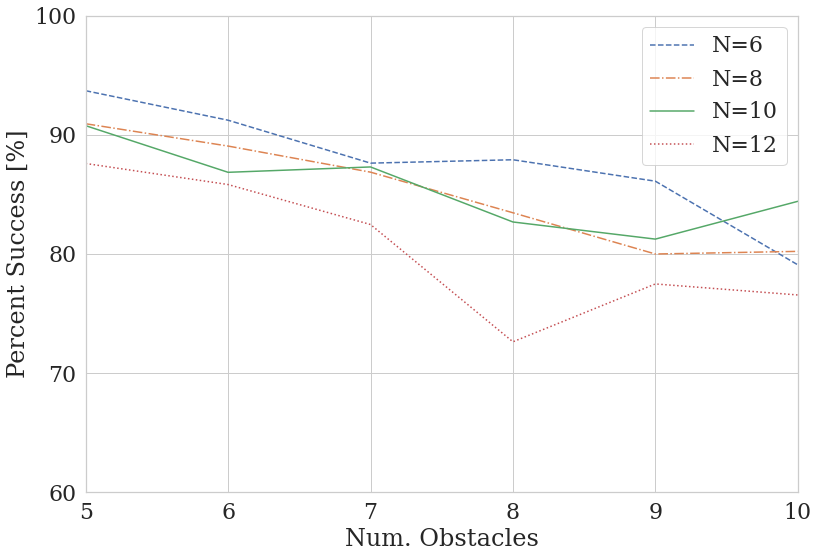

In [643]:
sns.set(font_scale=2, font="serif", style="whitegrid")

flierprops = {'alpha':0.5}
# sns.set(rc={'figure.figsize':(11.7,8.27)})

linestyles = ['--', '-.', '-', ':']

for ii, N in enumerate(plot_horizons):
    batch_percent_success = percent_successes[ii]
    xlabels = [ii for ii in range(0,6)]
    x_labels = [ii for ii in range(5,11)]
    y_labels = [batch_percent_success[x] for x in xlabels]
    ax1 = sns.lineplot(x=x_labels, y=y_labels, palette="Set3", label='N={}'.format(N), linewidth=1.5)
    ax1.lines[ii].set_linestyle(linestyles[ii])
    # ax1.set(xlabel="", ylabel="Percent Success")

ax1.set(xlabel="Num. Obstacles", ylabel="Percent Success [%]")
# ax1.grid(False)
#
yticks =  [10*ii for ii in range(11)]
ax1.set_yticks(yticks)

#
plt.tight_layout()
plt.legend(loc='upper right')
plt.xlim([5,10])
# plt.xticks(fontsize=13)
plt.ylim([60.,100.])
# plt.yticks(fontsize=13)

# sns.set_style("whitegrid")
st = sns.axes_style("whitegrid")
# sns.set_color_codes("")

figure = ax1.get_figure()
my_path ='G:\destop\project\SYCAMORE_report_template/figure'
# figure.savefig(my_path+"/percent_success_mpc.png")

In [235]:
#feasible solution
from test_results import load_result
N=12
plot_horizons = [6,8,10,12]
cost_ratio = {}

for ii, N in enumerate(plot_horizons):
    cost_ratio_horizon = {}
    for idx_obs in range(5,11):
        n_obs=idx_obs
        results = load_result (N=N,n_obs=n_obs)
        # print('N: '+ str(N) + ' obs: '+ str(n_obs)+' success percentege: '+ str(results['percentage']) + ' number of strategies: '+ str(results['strategies']))
        inf_list = []
        for i,x in enumerate(results['cost_ratios']):
            if x >= 10000 or x<0.99999999:
                inf_list.append(i)
        results['cost_ratios'] = np.delete(results['cost_ratios'],inf_list)
        cost_ratio_horizon[idx_obs]= results['cost_ratios']
    cost_ratio[N]=cost_ratio_horizon
print(cost_ratio)

{6: {5: array([1.07198161, 1.00000039, 1.00000144, 1.00000261, 1.00000175,
       1.00000981, 1.00005237, 1.00000089, 1.00002043, 1.00000105,
       1.00000011, 1.00909157, 1.00000371, 1.00000133, 1.00000077,
       1.00000338, 1.000002  , 1.00000134, 1.00000103, 1.00000017,
       1.00000041, 1.00000634, 1.00000105, 1.0190055 , 1.00000014,
       1.00000612, 1.01374871, 1.00000391, 1.00270517, 1.00000354,
       1.00000181, 1.00000011, 1.00000061, 1.00000214, 1.00000039,
       1.000005  , 1.00000082, 1.00000084, 1.00000098, 1.00001147,
       1.00000157, 1.0000048 , 1.00000039, 1.00000099, 0.99999999,
       1.00000449, 1.00000411, 1.00000049, 1.00000283, 1.00743153,
       1.00000023, 1.00000107, 1.00000321, 1.00000513, 1.01174726,
       1.00000045, 1.00000032, 1.00000718, 1.00003156, 1.00000076,
       1.00000536, 1.00000226, 1.00000031, 1.024865  , 1.00000216,
       1.00000084, 1.05444367, 1.00000092, 1.00087918, 1.0000005 ,
       1.00000045, 1.00000189, 1.00000152, 1.00000009,

In [634]:
import pandas as pd
results = {}


results['horizon'] = []
results['n_obs'] = []
results['cost_ratio'] = []
plot_horizons = [6,8,10,12]

for N, horizon in enumerate(plot_horizons):
    for n_obs in range(5,11):
        results['horizon'].extend([horizon]*len(cost_ratio[horizon][n_obs]))
        results['n_obs'].extend([n_obs]*len(cost_ratio[horizon][n_obs]))
        results['cost_ratio'].extend([100.*cr for cr in cost_ratio[horizon][n_obs]])
results = pd.DataFrame(results)
results

,horizon,n_obs,cost_ratio
0,6,5,107.198161
1,6,5,100.000039
2,6,5,100.000144
3,6,5,100.000261
4,6,5,100.000175
...,...,...,...
6887,12,10,100.027511
6888,12,10,101.317403
6889,12,10,106.211001
6890,12,10,103.169003


In [637]:
results_horizon = results.loc[results['horizon']==6]
results_nobs = results_horizon.loc[results_horizon['n_obs']==7]
cost_results = (results_nobs['cost_ratio'])

In [638]:
tolerence = 0.01
j=0
for result in cost_results:
    if result-100 >= tolerence:
        j+=1
optimaly_percentage = 1-j/len(cost_results)
optimaly_percentage

0.8440366972477065

In [655]:
import pandas as pd
results = {}

results['methods'] = ['Gurobi','OMISTL','CoCo','MLOPT']
results['percent'] = [98.87213123221,91.2280701754386,84.3400447427293,34.3600447427293]
results = pd.DataFrame(results)

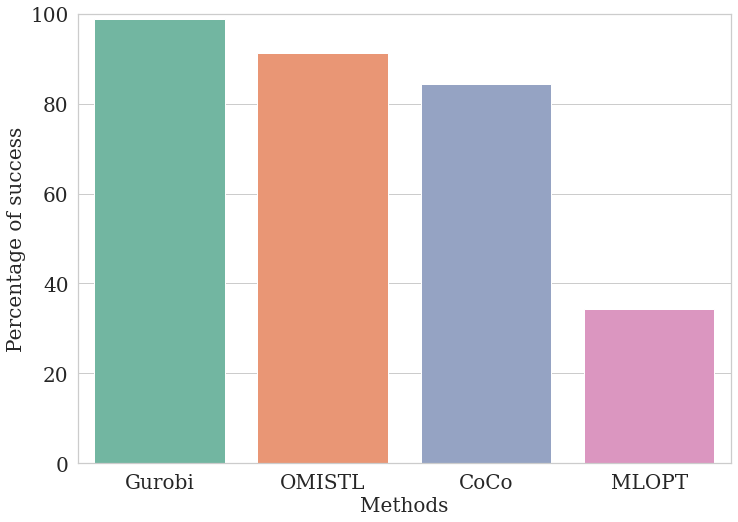

In [658]:
sns.set(font_scale=2, font="serif", style="whitegrid")

ax1 = sns.barplot(x='methods', y='percent', data= results,palette="Set2")

plt.ylim([0.,100.])
figure = ax1.get_figure()
size =20

font = {'family': 'serif',
         'weight': 'normal',
         'size': size,
         }
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)

# plt.legend(fontsize=size)

plt.xlabel('Methods', font)
plt.ylabel('Percentage of success', font)

my_path ='G:\destop\project\SYCAMORE_report_template/figure'
figure.savefig(my_path+"/percent_compare_ratios.png")

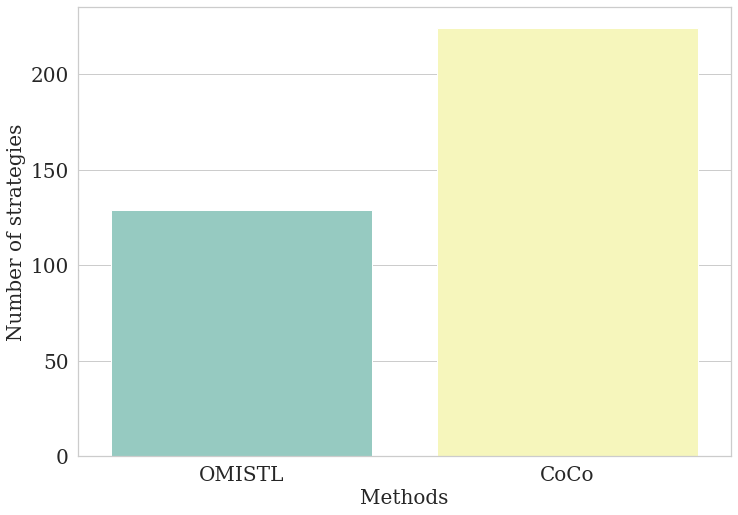

In [665]:
results = {}

results['methods'] = ['OMISTL','CoCo']
results['percent'] = [129,224]
results = pd.DataFrame(results)

sns.set(font_scale=2, font="serif", style="whitegrid")
ax1 = sns.barplot(x='methods', y='percent', data= results,palette="Set3")

# plt.ylim([0.,100.])
figure = ax1.get_figure()
size =20

font = {'family': 'serif',
         'weight': 'normal',
         'size': size,
         }
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)

# plt.legend(fontsize=size)

plt.xlabel('Methods', font)
plt.ylabel('Number of strategies', font)

my_path ='G:\destop\project\SYCAMORE_report_template/figure'
figure.savefig(my_path+"/number_strategy_methods.png")

In [649]:
sns.set(font_scale=2, font="serif", style="whitegrid")
import pandas as pd
flierprops = {'alpha':0.2}
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [651]:
import pandas as pd
results = {}


results['horizon'] = []
results['n_obs'] = []
results['cost_ratio'] = []
plot_horizons = [6,8,10,12]

for N, horizon in enumerate(plot_horizons):
    for n_obs in range(5,11):
        results['horizon'].extend([horizon]*len(cost_ratio[horizon][n_obs]))
        results['n_obs'].extend([n_obs]*len(cost_ratio[horizon][n_obs]))
        results['cost_ratio'].extend([100.*cr for cr in cost_ratio[horizon][n_obs]])
results = pd.DataFrame(results)
results

,horizon,n_obs,cost_ratio
0,6,5,107.198161
1,6,5,100.000039
2,6,5,100.000144
3,6,5,100.000261
4,6,5,100.000175
...,...,...,...
6887,12,10,100.027511
6888,12,10,101.317403
6889,12,10,106.211001
6890,12,10,103.169003


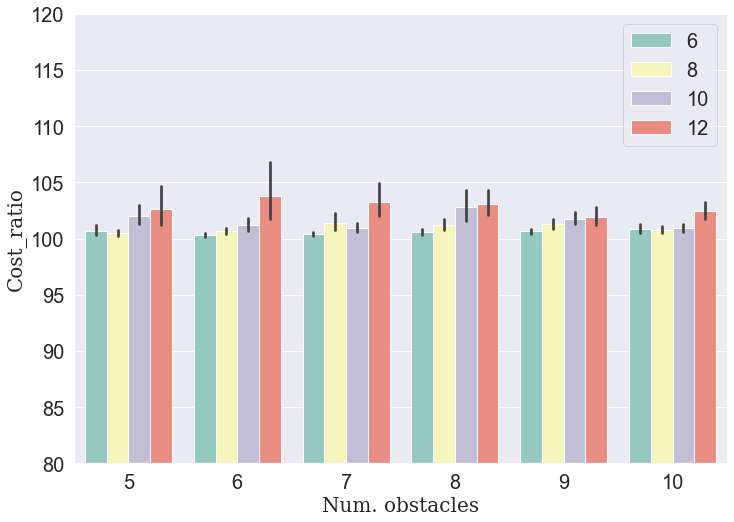

In [653]:
x =np.arange(0,240)
ax1 = sns.barplot(x='n_obs', y='cost_ratio', data= results, hue='horizon',palette="Set3")
plt.ylim([80.,120.])
figure = ax1.get_figure()
size =20

font = {'family': 'serif',
         'weight': 'normal',
         'size': size,
         }
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)
plt.legend(fontsize=size)

plt.xlabel('Num. obstacles', font)
plt.ylabel('Cost_ratio', font)

my_path ='G:\destop\project\SYCAMORE_report_template/figure'
# figure.savefig(my_path+"/cost_ratios.png")